#Giorgio Mendoza
#CS539-F23-F02
#Dr. J. Sethi

# Lab_3-2: More Pandas
This assignment requires more individual learning then the last one did - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. And of course, the discussion forums are open for interaction with your peers and the course staff.

## Question 1
Load the energy data from the file `Energy Indicators.xls`, which is a list of indicators of energy supply and renewable electricity production from the United Nations ([Energy%20Indicators.xls](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls)) for the year 2013, and put it into a DataFrame with the variable name of `energy`.

### Data cleaning and munging
Keep in mind that this is an Excel file and not a comma separated values (CSV) file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']`

Convert `Energy Supply` to gigajoules (there are 1,000,000 ($10^6$) gigajoules in a petajoule). For all countries which have missing data (e.g., data with "..."), make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

In [22]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab Notebooks/Energy Indicators.xlsx'

energy = pd.read_excel(file_path, skipfooter=38, skiprows=17)

#drop first two columns
energy.drop(energy.columns[[0, 1]], axis=1, inplace=True)

#rename columns
energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

#convert Energy Supply to gigajoules (1 petajoule = 1,000,000 gigajoules)
energy['Energy Supply'] = pd.to_numeric(energy['Energy Supply'], errors='coerce') * 1000000

#replace '...' with np.NaN
energy.replace('...', np.NaN, inplace=True)

country_rename = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}
energy['Country'] = energy['Country'].replace(country_rename)
energy.head(5)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,3.210000e+08,10.0,78.669280
1,Albania,1.020000e+08,35.0,100.000000
2,Algeria,1.959000e+09,51.0,0.551010
3,American Samoa,NaN,NaN,0.641026
4,Andorra,9.000000e+06,121.0,88.695650


There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these, e.g.:

`'Bolivia (Plurinational State of)'` should be `'Bolivia'` and `'Switzerland17'` should be `'Switzerland'`.

Next, load the GDP data from the file `world_bank.csv`, which should be a csv containing countries' GDP from 1960 onwards from the [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD): [world_bank.csv](http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv). Call this DataFrame `GDP`.

Make sure to skip the header, and rename the following list of countries:

In [15]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab Notebooks/world_bank.csv'
GDP = pd.read_csv(file_path, skiprows=4)

#cleaning country names in energy DataFrame
def clean_country_names(country):
    #remove digits & contents within parentheses
    country = ''.join([i for i in country if not i.isdigit()])
    country = country.split(' (')[0]
    return country

GDP['Country'] = GDP['Country Name'].apply(clean_country_names)
GDP.head(5)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66,Country
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.202235e+09,3.310056e+09,2.496648e+09,NaN,NaN,Aruba
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.129059e+10,2.180847e+10,2.370702e+10,2.821004e+10,2.611879e+10,2.968217e+10,...,1.003679e+12,9.242525e+11,8.823551e+11,1.020647e+12,9.910223e+11,9.975340e+11,9.216459e+11,1.082096e+12,NaN,Africa Eastern and Southern
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,NaN,NaN,Afghanistan
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.040414e+10,1.112789e+10,1.194319e+10,1.267633e+10,1.383837e+10,1.486223e+10,...,8.649905e+11,7.607345e+11,6.905464e+11,6.837487e+11,7.416899e+11,7.945430e+11,7.844457e+11,8.358084e+11,NaN,Africa Western and Central
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.372444e+11,8.721929e+10,4.984049e+10,6.897276e+10,7.779294e+10,6.930910e+10,5.361907e+10,7.254699e+10,NaN,Angola


Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `scimagojr-3.xlsx` (or its equivalent: [scimagojr.xlsx](https://www.scimagojr.com/countryrank.php?category=2102&out=xls)), which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame `ScimEn`.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years that are in common of GDP data and only the top 15 countries by Scimagojr `Rank` (Rank 1 through 15). Tip: You could do this by dropping columns 1 - 50 for GDP first and then you'd only have 2006 - 2015 so you can then do the merge before selecting the top 15 (but you could also do it the other way by first merging and then dropping, as well).

The index of this DataFrame should be the name of the country, and the columns should be (supposing years 2006 - 2015):

`['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',  'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']`

*This function should return a DataFrame with 20 columns and 15 entries.*

In [31]:
import pandas as pd
import numpy as np

def answer_one():
    #load & process ScimEn dataset
    new_file_path_scimen = '/content/drive/MyDrive/Colab Notebooks/scimago.xls'
    ScimEn = pd.read_excel(new_file_path_scimen)
    ScimEn_sorted = ScimEn.sort_values(by='Rank', ascending=True)
    top_15 = ScimEn_sorted.head(15)

    #load & process Energy dataset
    file_path_energy = '/content/drive/MyDrive/Colab Notebooks/Energy Indicators.xlsx'
    energy = pd.read_excel(file_path_energy, skipfooter=38, skiprows=17)
    energy.drop(energy.columns[[0, 1]], axis=1, inplace=True)
    energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    energy['Energy Supply'] = energy['Energy Supply'] * 1000000  #assuming 'Energy Supply' is in petajoules
    energy.replace('...', np.NaN, inplace=True)

    #clean country names in Energy dataset
    energy['Country'] = energy['Country'].replace('\d+', '', regex=True)  #remove digits
    energy['Country'] = energy['Country'].replace('\s+\(.*\)', '', regex=True)  #remove contents within parentheses

    #standardize country names
    country_rename_energy = {
        "Republic of Korea": "South Korea",
        "United States of America": "United States",
        "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
        "China, Hong Kong Special Administrative Region": "Hong Kong"
    }
    energy['Country'] = energy['Country'].replace(country_rename_energy)

    #oad & process GDP dataset
    file_path_gdp = '/content/drive/MyDrive/Colab Notebooks/world_bank.csv'
    GDP = pd.read_csv(file_path_gdp, skiprows=4)
    GDP['Country'] = GDP['Country Name'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]).split(' (')[0])

    #renaming countries in GDP dataset
    gdp_country_rename = {
        "Korea, Rep.": "South Korea",
        "Iran, Islamic Rep.": "Iran",
        "Hong Kong SAR, China": "Hong Kong"
    }
    GDP['Country'] = GDP['Country'].replace(gdp_country_rename)

    #selecting GDP data from years 2006 to 2015
    columns_to_keep = ['Country', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
    GDP = GDP[columns_to_keep]

    #merge datasets
    merged_df = pd.merge(top_15, energy, how='inner', left_on='Country', right_on='Country')
    final_df = pd.merge(merged_df, GDP, how='inner', left_on='Country', right_on='Country')

    #set country name as index
    final_df.set_index('Country', inplace=True)

    return final_df

result = answer_one()
print(result)

                    Rank            Region  Documents  Citable documents  \
Country                                                                    
China                  1    Asiatic Region     360468             358777   
United States          2  Northern America     199442             195042   
India                  3    Asiatic Region      76103              74167   
Japan                  4    Asiatic Region      56249              55680   
United Kingdom         5    Western Europe      52572              51156   
Germany                6    Western Europe      47781              46767   
Russian Federation     7    Eastern Europe      43567              43290   
Canada                 8  Northern America      39036              38276   
Italy                  9    Western Europe      35991              34424   
South Korea           10    Asiatic Region      35294              35005   
Iran                  11       Middle East      29776              29448   
France      

## Question 2
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*


<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text  x="300" y="165" font-family="Verdana" font-size="35">Keep intersection only: https://upload.wikimedia.org/wikipedia/commons/8/8d/Intersection_of_3_circles_7.svg</text>
</svg>

In [35]:
import pandas as pd
import numpy as np

def answer_two():
    # Load and process the ScimEn dataset (entire dataset this time)
    new_file_path_scimen = '/content/drive/MyDrive/Colab Notebooks/scimago.xls'
    ScimEn_all = pd.read_excel(new_file_path_scimen)

    # [Repeat the process to load and clean the Energy and GDP datasets]

    # Merge the datasets (using the entire ScimEn dataset)
    merged_all = pd.merge(ScimEn_all, energy, how='inner', left_on='Country', right_on='Country')
    merged_all = pd.merge(merged_all, GDP, how='inner', left_on='Country', right_on='Country')

    # Load and process the top 15 ScimEn dataset
    ScimEn_top_15 = ScimEn_all.sort_values(by='Rank', ascending=True).head(15)
    merged_top_15 = pd.merge(ScimEn_top_15, energy, how='inner', left_on='Country', right_on='Country')
    merged_top_15 = pd.merge(merged_top_15, GDP, how='inner', left_on='Country', right_on='Country')

    # Calculate the difference in number of entries
    entries_lost = len(merged_all) - len(merged_top_15)

    return entries_lost

# Call the function
lost_entries = answer_two()
print(lost_entries)


145


#Answer: I lost 145 according to the code above

Answer the following questions in the context of only the top 15 countries by Scimagojr Rank (aka the DataFrame returned by `answer_one()`)


## Question 3
What is the average GDP over the last 10 years for each country? (exclude missing values from this calculation.)

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [36]:
def answer_three():
    Top15 = answer_one()
    #select columns for last 10 years
    years = [str(year) for year in range(2006, 2016)]

    #calculate mean, exclude missing values
    avgGDP = Top15[years].mean(axis=1).sort_values(ascending=False)

    return avgGDP

#get Series of average GDP
avg_gdp_series = answer_three()
print(avg_gdp_series)


Country
United States         1.570403e+13
China                 6.927702e+12
Japan                 5.239642e+12
Germany               3.523342e+12
United Kingdom        2.792011e+12
France                2.691337e+12
Italy                 2.142986e+12
Brazil                1.988889e+12
Russian Federation    1.666746e+12
Canada                1.616359e+12
India                 1.602352e+12
Spain                 1.400727e+12
South Korea           1.221372e+12
Australia             1.207106e+12
Iran                  4.563261e+11
dtype: float64


## Question 4
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [39]:
def answer_four():
    Top15 = answer_one()
    avg_gdp_series = answer_three()

    #identify country with 6th largest average GDP
    sixth_largest_gdp_country = avg_gdp_series.index[5]

    #get GDP change for this country from 2006 to 2015
    gdp_change = Top15.loc[sixth_largest_gdp_country, '2015'] - Top15.loc[sixth_largest_gdp_country, '2006']

    return sixth_largest_gdp_country, gdp_change

#call function
country, gdp_change_sixth = answer_four()
print("Country with the 6th largest average GDP:", country)
print("GDP change from 2006 to 2015:", gdp_change_sixth)


Country with the 6th largest average GDP: France
GDP change from 2006 to 2015: 118652421857.7998


## Question 5
What is the mean `Energy Supply per Capita`?

*This function should return a single number.*

In [40]:
def answer_five():
    Top15 = answer_one()

    # get mean of 'Energy Supply per Capita' column
    mean_energy_supply_per_capita = Top15['Energy Supply per Capita'].mean()

    return mean_energy_supply_per_capita

#call function
mean_energy_supply_per_capita = answer_five()
print(mean_energy_supply_per_capita)


157.6


# Answer: The mean Energy Supply per Capita is 157.6

## Question 6
What country has the maximum `% Renewable` and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [41]:
def answer_six():
    Top15 = answer_one()

    #find country with maximum % Renewable
    max_renewable = Top15['% Renewable'].idxmax()
    max_renewable_percentage = Top15.loc[max_renewable, '% Renewable']

    return (max_renewable, max_renewable_percentage)

#call function
max_renewable_country, max_renewable_percentage = answer_six()
print(max_renewable_country, max_renewable_percentage)


Brazil 69.64803


#Answer: The country with the maximum renewable % is Brazil with ~69.64%

## Question 7
Create a new column that is the ratio of Self-Citations to Total Citations. What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [42]:
def answer_seven():
    Top15 = answer_one()

    #create a column for ratio of Self-Citations to Total Citations
    Top15['Citation Ratio'] = Top15['Self-citations'] / Top15['Citations']

    #find country with maximum citation ratio
    max_citation_ratio = Top15['Citation Ratio'].idxmax()
    max_ratio = Top15.loc[max_citation_ratio, 'Citation Ratio']

    return (max_citation_ratio, max_ratio)

#call function
country_with_max_ratio, max_ratio = answer_seven()
print(country_with_max_ratio, max_ratio)


China 0.689249218122882


## Question 8

Create a column that estimates the population using `Energy Supply` and `Energy Supply per Capita`. What is the third most populous country according to this estimate?

*This function should return a single string value.*

In [43]:
def answer_eight():
    Top15 = answer_one()

    #estimate population
    Top15['Estimated Population'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']

    #sort by estimated population in descending order and get third country
    third_most_populous = Top15.sort_values(by='Estimated Population', ascending=False).iloc[2].name

    return third_most_populous

#call function
third_most_populous_country = answer_eight()
print(third_most_populous_country)

United States


## Question 9
Create a column that estimates the number of citable documents per person. What is the correlation between the number of citable documents per capita and the `Energy Supply per Capita`? Use the `.corr()` method, (Pearson's correlation), for the correlation.

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between `Energy Supply per Capita` vs. `Citable docs per Capita`)*

In [48]:
def answer_nine():
    Top15 = answer_one()

    #ensure 'Energy Supply' & 'Energy Supply per Capita' are in float format
    Top15['Energy Supply'] = pd.to_numeric(Top15['Energy Supply'], errors='coerce')
    Top15['Energy Supply per Capita'] = pd.to_numeric(Top15['Energy Supply per Capita'], errors='coerce')

    #estimate population
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']

    #calculate number of citable documents per person
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']

    #calculate correlation
    correlation = Top15['Citable docs per Capita'].corr(Top15['Energy Supply per Capita'])

    print("Type of correlation result:", type(correlation))
    return correlation

correlation_value = answer_nine()
print("Correlation value:", correlation_value)

Type of correlation result: <class 'numpy.float64'>
Correlation value: 0.7114342527331208


## Question 10
Create a new column with a 1 if the country's `% Renewable` value is at or above the median for all countries in the top 15, and a 0 if the country's `% Renewable` value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [50]:
def answer_ten():
    Top15 = answer_one()

    #calculate median of '% Renewable' for all countries
    median_renewable = Top15['% Renewable'].median()

    #create a new column 'HighRenew'
    # 1 if '% Renewable' is at or above median, 0 if below
    Top15['HighRenew'] = (Top15['% Renewable'] >= median_renewable).astype(int)

    #return 'HighRenew' column as a Series, sorted by rank
    return Top15['HighRenew'].sort_values(ascending=True)

#call function
HighRenew = answer_ten()
print(HighRenew)


Country
United States         0
India                 0
Japan                 0
United Kingdom        0
South Korea           0
Iran                  0
Australia             0
China                 1
Germany               1
Russian Federation    1
Canada                1
Italy                 1
France                1
Spain                 1
Brazil                1
Name: HighRenew, dtype: int64


## Question 11
Use the following dictionary to group the Countries by Continent, then create a dataframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

In [ ]:
ContinentDict  = {'China':'Asia',
                  'United States':'North America',
                  'Japan':'Asia',
                  'United Kingdom':'Europe',
                  'Russian Federation':'Europe',
                  'Canada':'North America',
                  'Germany':'Europe',
                  'India':'Asia',
                  'France':'Europe',
                  'South Korea':'Asia',
                  'Italy':'Europe',
                  'Spain':'Europe',
                  'Iran':'Asia',
                  'Australia':'Australia',
                  'Brazil':'South America'}

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [51]:
def answer_eleven():
    Top15 = answer_one()

    #dictionary mapping countries to continents
    ContinentDict = {
        'China':'Asia', 'United States':'North America', 'Japan':'Asia',
        'United Kingdom':'Europe', 'Russian Federation':'Europe', 'Canada':'North America',
        'Germany':'Europe', 'India':'Asia', 'France':'Europe',
        'South Korea':'Asia', 'Italy':'Europe', 'Spain':'Europe',
        'Iran':'Asia', 'Australia':'Australia', 'Brazil':'South America'
    }

    #estimate population for each country
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']

    #map countries to continents
    Top15['Continent'] = Top15.index.to_series().map(ContinentDict)

    #group by continent & calculate desired statistics
    result = Top15.groupby('Continent')['PopEst'].agg(['size', 'sum', 'mean', 'std'])

    return result

#call function
continent_stats = answer_eleven()
print(continent_stats)

               size               sum          mean           std
Continent                                                        
Asia              5   2898666386.6106  5.797333e+08  6.790979e+08
Australia         1   23316017.316017  2.331602e+07           NaN
Europe            6  457929667.216372  7.632161e+07  3.464767e+07
North America     2   352855249.48025  1.764276e+08  1.996696e+08
South America     1  205915254.237288  2.059153e+08           NaN


## Question 12
Cut `% Renewable` into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a __Series__ with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [53]:
def answer_twelve():
    Top15 = answer_one()

    #dictionary mapping countries to continents
    ContinentDict = {
        'China':'Asia', 'United States':'North America', 'Japan':'Asia',
        'United Kingdom':'Europe', 'Russian Federation':'Europe', 'Canada':'North America',
        'Germany':'Europe', 'India':'Asia', 'France':'Europe',
        'South Korea':'Asia', 'Italy':'Europe', 'Spain':'Europe',
        'Iran':'Asia', 'Australia':'Australia', 'Brazil':'South America'
    }

    #assigning countries to continents
    Top15['Continent'] = Top15.index.to_series().map(ContinentDict)

    #creating bins for '% Renewable'
    Top15['% Renewable Bins'] = pd.cut(Top15['% Renewable'], 5)

    #group by Continent and '% Renewable' bins, then count the number of countries
    result = Top15.groupby(['Continent', '% Renewable Bins']).size()

    return result

#call function
continent_renewable_bins = answer_twelve()
print(continent_renewable_bins)

Continent      % Renewable Bins
Asia           (2.212, 15.753]     4
               (15.753, 29.227]    1
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    0
Australia      (2.212, 15.753]     1
               (15.753, 29.227]    0
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    0
Europe         (2.212, 15.753]     1
               (15.753, 29.227]    3
               (29.227, 42.701]    2
               (42.701, 56.174]    0
               (56.174, 69.648]    0
North America  (2.212, 15.753]     1
               (15.753, 29.227]    0
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    1
South America  (2.212, 15.753]     0
               (15.753, 29.227]    0
               (29.227, 42.701]    0
               (42.701, 56.174]    0
               (56.174, 69.648]    1
dtype: int64


## Question 13
Convert the Population Estimate series to a string with thousands separator (using commas). Do not round the results.

e.g. 317615384.61538464 -> 317,615,384.61538464

*This function should return a Series `PopEst` whose index is the country name and whose values are the population estimate string.*

In [54]:
def answer_thirteen():
    Top15 = answer_one()

    #estimate population
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']

    #convert population estimate to string with commas
    Top15['PopEst'] = Top15['PopEst'].apply(lambda x: "{:,}".format(x))

    return Top15['PopEst']

#call function
PopEst = answer_thirteen()
print(PopEst)

Country
China                 1,367,645,161.2903225
United States          317,615,384.61538464
India                 1,276,730,769.2307692
Japan                  127,409,395.97315437
United Kingdom         63,870,967.741935484
Germany                 80,369,696.96969697
Russian Federation            143,500,000.0
Canada                  35,239,864.86486486
Italy                  59,908,256.880733944
South Korea            49,805,429.864253394
Iran                    77,075,630.25210084
France                  63,837,349.39759036
Spain                    46,443,396.2264151
Australia              23,316,017.316017315
Brazil                 205,915,254.23728815
Name: PopEst, dtype: object


## Optional

Use the built in function `plot_optional()` to see an example visualization.

This is an example of a visualization that can be created to help understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.


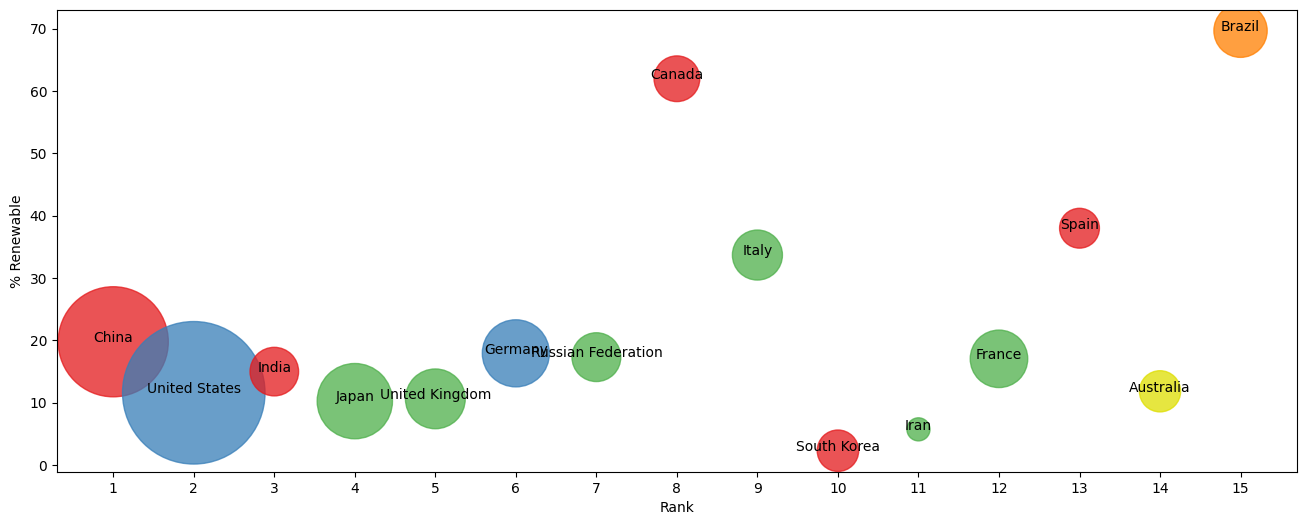

In [55]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter',
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'],
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")

plot_optional() # Be sure to comment out plot_optional() before submitting the assignment!